# Testing Shap Values

# Preliminaries

In [1]:

from mercs import Mercs
import numpy as np
import pandas as pd

In [2]:
from mercs.tests.setup import RANDOM_STATE, default_dataset

## Data - Query

Generate decent data and a normal query code.

In [3]:
train, test = default_dataset()
print(train.shape)

q_code = np.array([-1, -1, -1, -1, 0, 0, 0, 1])

(800, 8)


# Setup - Basic

In [4]:
m_basic = Mercs(
    random_state=RANDOM_STATE,
    prediction_algorithm="it",
    evaluation_algorithm="dummy",
    selection_algorithm="random",
    stepsize=0.1,
    nb_iterations=5,
    fraction_missing=0.3,
    max_depth=4,
    calculation_method_feature_importances=None,
)

m_basic.fit(train, nominal_attributes={7})
y_pred_01 = m_basic.predict(test, q_code=q_code)

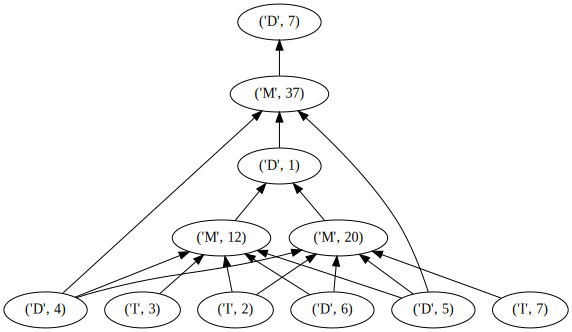

In [5]:
m_basic.show_q_diagram()

In [6]:
dt = m_basic.m_list[0].model
desc_ids, targ_ids = m_basic.m_list[0].desc_ids, m_basic.m_list[0].targ_ids

desc_ids, targ_ids

([0, 1, 5, 6], [3])

In [7]:
m_basic.m_fimps[0]

array([0.19487116, 0.08789563, 0.        , 0.        , 0.        ,
       0.34996847, 0.36726474, 0.        ])

# Setup - Shap

In [8]:
m_shap = Mercs(
    random_state=RANDOM_STATE,
    prediction_algorithm="it",
    evaluation_algorithm="dummy",
    selection_algorithm="random",
    stepsize=0.1,
    nb_iterations=5,
    fraction_missing=0.3,
    max_depth=4,
    calculation_method_feature_importances="shap",
)

m_shap.fit(train, nominal_attributes={7})
y_pred_01 = m_shap.predict(test, q_code=q_code)


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.

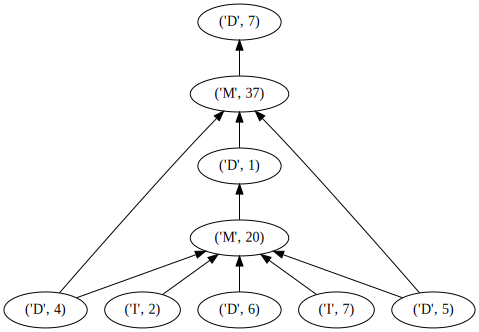

In [9]:
m_shap.show_q_diagram()

In [10]:
dt = m_shap.m_list[0].model
desc_ids, targ_ids = m_shap.m_list[0].desc_ids, m_shap.m_list[0].targ_ids

desc_ids, targ_ids

([0, 1, 5, 6], [3])

In [11]:
m_shap.m_fimps[0]

array([0.18088446, 0.17217632, 0.        , 0.        , 0.        ,
       0.14855112, 0.4983881 , 0.        ])

Let us summarize a bit more obviously;

In [12]:
tree_idx = 0
tree = m_shap.m_list[tree_idx]

desc_ids = tree.desc_ids
targ_ids = tree.targ_ids

assert desc_ids == m_basic.m_list[tree_idx].desc_ids
assert targ_ids == m_basic.m_list[tree_idx].targ_ids

clas_fimps = m_basic.m_fimps[tree_idx]
shap_fimps = m_shap.m_fimps[tree_idx]


msg = """
Tree IDX:  {}
desc_ids = {}
targ_ids = {}

-------

Classic feature importances:
{}

Shap feature importances:
{}

""".format(tree_idx, desc_ids, targ_ids, clas_fimps,shap_fimps)

print(msg)


Tree IDX:  0
desc_ids = [0, 1, 5, 6]
targ_ids = [3]

-------

Classic feature importances:
[0.19487116 0.08789563 0.         0.         0.         0.34996847
 0.36726474 0.        ]

Shap feature importances:
[0.18088446 0.17217632 0.         0.         0.         0.14855112
 0.4983881  0.        ]


